In [127]:
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
train_df =pd.read_csv('/content/train.csv')
test_df =pd.read_csv('/content/test.csv')
combine =[train_df, test_df]
frame = pd.DataFrame(data=train_df)
frame2 = pd.DataFrame(data=test_df)
frame

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [18]:
total1 = 0
survived1 = 0
total2 = 0
survived2 = 0
total3 = 0
survived3 = 0
for i in range(891):
  if(frame['Pclass'][i] == 1):
    total1+=1
    if(frame['Survived'][i] == 1):
      survived1+=1
  if(frame['Pclass'][i] == 2):
    total2+=1
    if(frame['Survived'][i] == 1):
      survived2+=1
  if(frame['Pclass'][i] == 3):
    total3+=1
    if(frame['Survived'][i] == 1):
      survived3+=1
print("first class:  %d/%d=%f\nsecond class:  %d/%d=%f\nthird class:  %d/%d=%f" %(survived1,total1,survived1/total1,survived2,total2,survived2/total2,survived3,total3,survived3/total3))



first class:  136/216=0.629630
second class:  87/184=0.472826
third class:  119/491=0.242363


In [19]:
maleT = 0
maleS = 0
femaleT = 0
femaleS = 0
for i in range(891):
  if(frame['Sex'][i] == 'male'):
    maleT+=1
    if(frame['Survived'][i] == 1):
      maleS+=1
  if(frame['Sex'][i] == 'female'):
    femaleT+=1
    if(frame['Survived'][i] == 1):
      femaleS+=1
print("male:  %d/%d=%f\nfemale:  %d/%d=%f" %(maleS,maleT,maleS/maleT,femaleS,femaleT,femaleS/femaleT))



male:  109/577=0.188908
female:  233/314=0.742038


In [6]:
frame.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


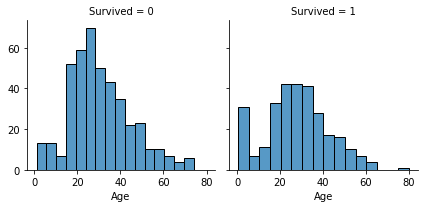

In [33]:

g = sns.FacetGrid(train_df, col="Survived")
g.map(sns.histplot,"Age")

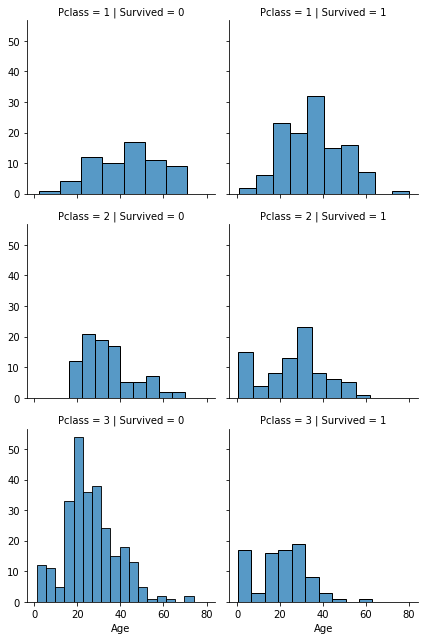

In [34]:
g = sns.FacetGrid(train_df, col="Survived", row="Pclass")
g.map(sns.histplot,"Age")

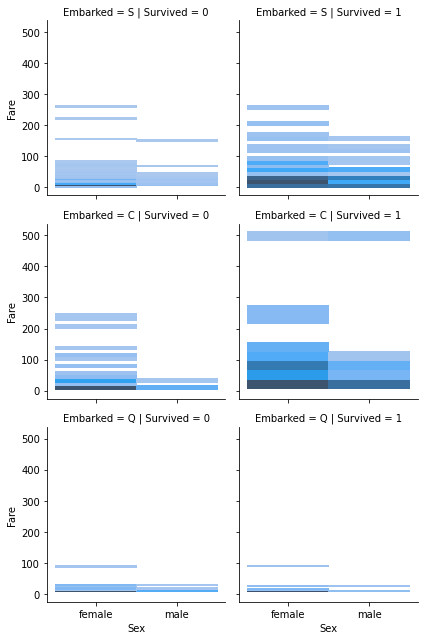

In [35]:
g = sns.FacetGrid(train_df, col="Survived", row="Embarked")
g.map(sns.histplot,"Sex","Fare")

In [40]:
print("rate of duplicates:  %f"%(1-(len(pd.unique(frame['Ticket']))/frame['Ticket'].count())))

rate of duplicates:  0.235690


In [52]:
print("number of missing cabins:  %d-%d=%d"%(frame['PassengerId'].count()+frame2['PassengerId'].count(),frame['Cabin'].count()+frame2['Cabin'].count(),frame['PassengerId'].count()+frame2['PassengerId'].count()-frame['Cabin'].count()-frame2['Cabin'].count()))

number of missing cabins:  1309-295=1014


In [147]:
frame2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,73.0,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,34.0,0,0,359309,8.0500,NaN,S,0


In [128]:
#Q16
frame['Gender'] = 0
frame2['Gender'] = 0
for i in range(len(frame['Sex'])):
  if(frame['Sex'][i] == 'female'):
    frame.at[i,'Gender'] = 1
for i in range(len(frame2['Sex'])):
  if(frame2['Sex'][i] == 'female'):
    frame2.at[i,'Gender'] = 1  
frame

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [129]:
#Q17
import random
find = frame['Age'].isnull()
for i in range(len(frame['Age'])):
  if(find[i] == True):
    frame.at[i,'Age'] = random.randint(0,81)
find = frame2['Age'].isnull()
for i in range(len(frame2['Age'])):
  if(find[i] == True):
    frame2.at[i,'Age'] = random.randint(0,81)
print(frame['Age'].isnull().sum())
frame


0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,12.0,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [130]:
#Q18
find = frame['Embarked'].isnull()
for i in range(len(frame['Embarked'])):
  if(find[i] == True):
    frame.at[i,'Embarked'] = 'S'
find = frame2['Embarked'].isnull()
for i in range(len(frame2['Embarked'])):
  if(find[i] == True):
    frame2.at[i,'Embarked'] = 'S'
print(frame['Embarked'].isnull().sum())
frame

0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,12.0,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [164]:
#Q19
mod = frame['Fare'].mode()
for i in range(len(frame['Fare'])):
  if(frame['Fare'][i] == 0):
    frame.at[i,'Fare'] = mod
    print(frame['Fare'][i])
mod = frame2['Fare'].mode()
for i in range(len(frame2['Fare'])):
  if(frame2['Fare'][i] == 0):
    frame2.at[i,'Fare'] = mod
    print(frame2['Fare'][i])
#print(frame['Fare'].isnull().sum())
#frame
frame2['Fare'][152]

8.05

In [165]:
#Q20
frame['FareBand'] = 0
frame2['FareBand'] = 0
for i in range(len(frame['Fare'])):
  if(frame['Fare'][i] >7.91 and frame['Fare'][i] <= 14.454):
    frame.at[i,'FareBand'] = 1
  if(frame['Fare'][i] >14.454 and frame['Fare'][i] <= 31.0):
    frame.at[i,'FareBand'] = 2
  if(frame['Fare'][i] >31.0):
    frame.at[i,'FareBand'] = 3
for i in range(len(frame2['Fare'])):
  if(frame2['Fare'][i] >7.91 and frame2['Fare'][i] <= 14.454):
    frame2.at[i,'FareBand'] = 1
  if(frame2['Fare'][i] >14.454 and frame2['Fare'][i] <= 31.0):
    frame2.at[i,'FareBand'] = 2
  if(frame2['Fare'][i] >31.0):
    frame2.at[i,'FareBand'] = 3 
frame

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,12.0,1,2,W./C. 6607,23.4500,NaN,S,1,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,2
